In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
df=pd.read_csv('/content/Abalone case study.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [40]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


First 5 rows of Dataset

In [41]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


Last 5 rows of Dataset

In [42]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [43]:
df.shape

(4177, 9)

There are 4177 Rows and 9 Columns 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Here Sex is target variable and object , Remaining variables are float

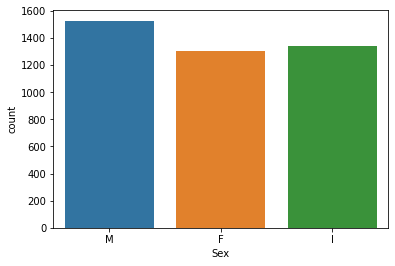

In [45]:
sns.countplot(df['Sex'])

Countplot shows the productivity of the sex

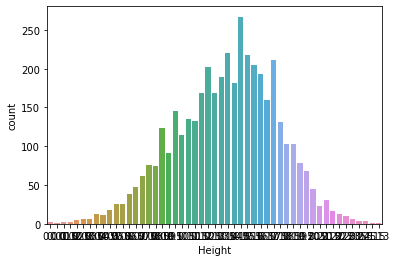

In [46]:
sns.countplot(df['Height'])

Countplot shows the Productivity of Hieght

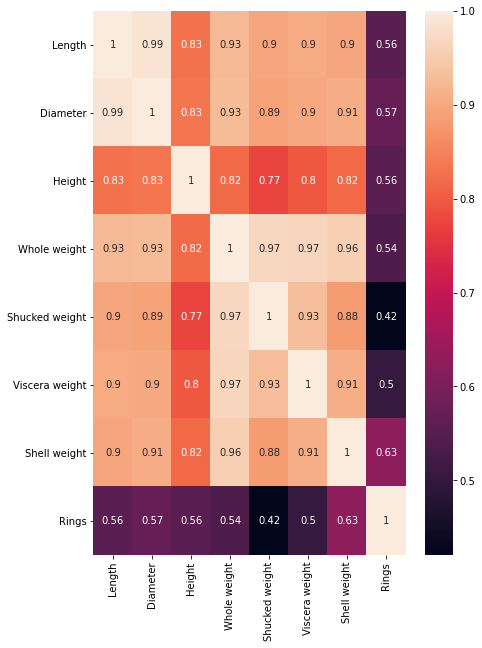

In [47]:
corr_hmap=df.corr()
plt.figure(figsize=(7,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Heat map shows the co-relationship between columns

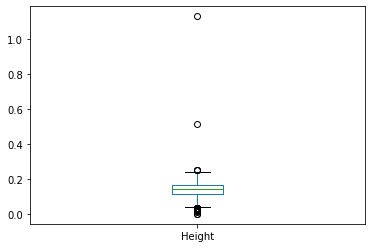

In [48]:
df["Height"].plot.box()

By using the box plot we know that there will be outliers in height

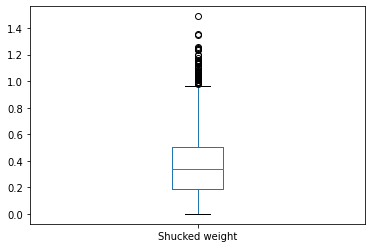

In [49]:
df["Shucked weight"].plot.box()

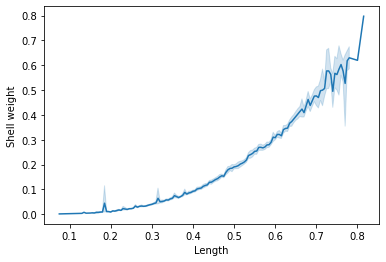

In [50]:
sns.lineplot( x=df["Length"], y=df["Shell weight"])

By using the method of lineplot we get to know that Lenght and shell weight is corelated

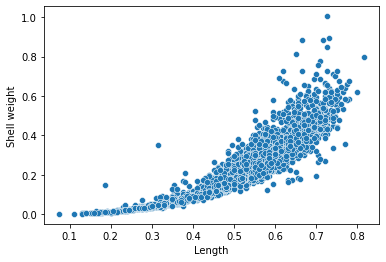

In [51]:
sns.scatterplot( x=df["Length"], y=df["Shell weight"])

By using the scatter plot method we get to that lenght and shell weight are highly corelated

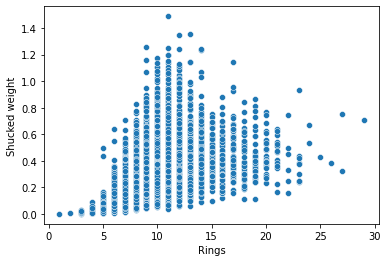

In [52]:
sns.scatterplot( x=df["Rings"], y=df["Shucked weight"])

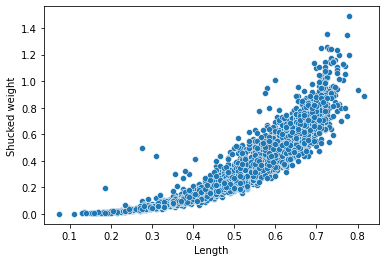

In [53]:
sns.scatterplot( x=df["Length"], y=df["Shucked weight"])

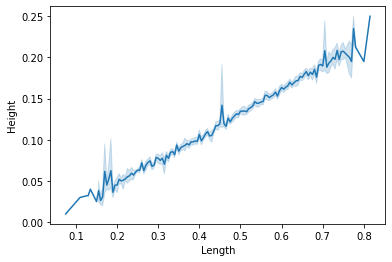

In [54]:
sns.lineplot( x=df["Length"], y=df["Height"])

In [55]:
from sklearn.preprocessing import LabelEncoder 
  
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [56]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,66,56,18,715,417,199,263,14
1,2,45,36,17,285,178,94,113,6
2,0,81,67,26,962,480,280,374,8
3,2,63,56,24,718,400,225,273,9
4,1,41,34,15,253,159,76,87,6
...,...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,442,10
4173,2,93,71,26,1411,832,426,463,9
4174,2,95,78,40,1727,994,571,550,8
4175,0,100,80,29,1610,1005,518,530,9


In [57]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(4177, 9)
(4093, 9)


By using z_score we can remove some of unwanted datas

In [58]:
df1.skew()

Sex              -0.102339
Length           -0.571242
Diameter         -0.551814
Height           -0.178398
Whole weight      0.092772
Shucked weight    0.248479
Viscera weight    0.377494
Shell weight      0.145083
Rings             0.712172
dtype: float64

In [59]:
x=df.drop('Sex',axis=1)
y=df.Sex

In [60]:
x,y

(      Length  Diameter  Height  ...  Viscera weight  Shell weight  Rings
 0         66        56      18  ...             199           263     14
 1         45        36      17  ...              94           113      6
 2         81        67      26  ...             280           374      8
 3         63        56      24  ...             225           273      9
 4         41        34      15  ...              76            87      6
 ...      ...       ...     ...  ...             ...           ...    ...
 4172      88        73      32  ...             475           442     10
 4173      93        71      26  ...             426           463      9
 4174      95        78      40  ...             571           550      8
 4175     100        80      29  ...             518           530      9
 4176     117        94      38  ...             732           813     11
 
 [4177 rows x 8 columns], 0       2
 1       2
 2       0
 3       2
 4       1
        ..
 4172    0
 4173   

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(2923, 8) (1254, 8)
(2923,) (1254,)


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

selecting the best model for the Data

In [63]:
KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [64]:
models=[]
models.append(('KNeighborsClassifier',KNN))
 # models.append(('SVC',sv))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [65]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [66]:
!pip install scikit-plot

In [67]:
import scikitplot as skplt

In [68]:
def multi_class_ROC(model, X_test, y_test):
  y_predict_proba = model.predict_proba(X_test)
  skplt.metrics.plot_roc_curve(y_test, y_predict_proba)
  plt.show()

****************************** KNeighborsClassifier ********************************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score= 0.5318979266347688


cross_val_score= 0.5144917558775945




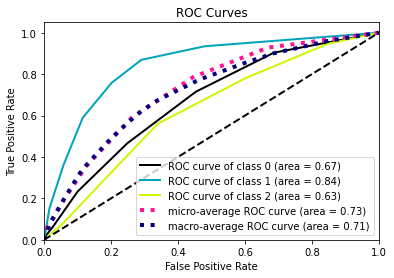




****************************** LogisticRegression ********************************************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.5303030303030303


cross_val_score= 0.5451298291510333




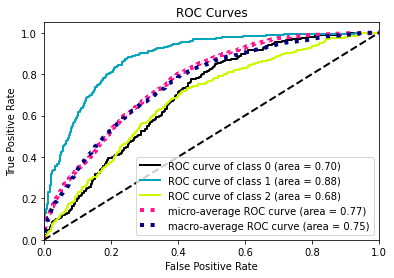




****************************** DecisionTreeClassifier ********************************************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6, splitter='best')


Accuracy_score= 0.49282296650717705


cross_val_score= 0.4946192328433904




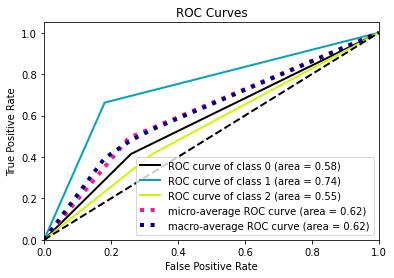




****************************** GaussianNB ********************************************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score= 0.5127591706539075


cross_val_score= 0.5144808555069821




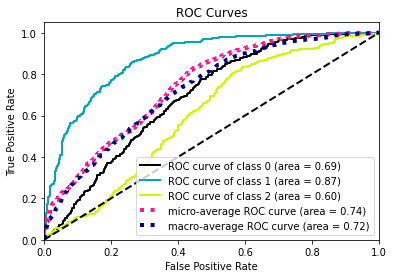

In [69]:
Model = []
score = []
cvs = []
rocscore=[]
for name,model in models:
    print('******************************',name,'********************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    y_predict_proba=pre
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print("cross_val_score=",sc)
    cvs.append(sc*100)
    print('\n')
    multi_class_ROC(model, x_test, y_test)
    print('\n\n')

In [70]:
result=pd.DataFrame({'Model':models,'Accuracy_score':AS,'Cross_val_score':sc,'ROC_AUC_curve':score})

In [71]:
result

,Model,Accuracy_score,Cross_val_score,ROC_AUC_curve
0,"(KNeighborsClassifier, KNeighborsClassifier(al...",0.512759,0.514481,53.189793
1,"(LogisticRegression, LogisticRegression(C=1.0,...",0.512759,0.514481,53.030303
2,"(DecisionTreeClassifier, DecisionTreeClassifie...",0.512759,0.514481,49.282297
3,"(GaussianNB, GaussianNB(priors=None, var_smoot...",0.512759,0.514481,51.275917


In [72]:
import pickle
project10_model = pickle.dumps(DT) 
DT_from_pickle = pickle.loads(project10_model) 
DT_from_pickle.predict(x_test)

array([2, 2, 1, ..., 2, 2, 1])